<a href="https://colab.research.google.com/github/nathanbarry474/google-colab-notebooks/blob/master/Convnet_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing and saving the data

In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm

In [ ]:
  CATS = '/content/drive/My Drive/Programming/Data/PetImages/Cat'
  DOGS = '/content/drive/My Drive/Programming/Data/PetImages/Dog'

In [ ]:
REBUILD_DATA = False

class DogsVsCats():
  IMG_SIZE = 50
  CATS = '/content/drive/My Drive/Programming/Data/PetImages/Cat'
  DOGS = '/content/drive/My Drive/Programming/Data/PetImages/Dog'
  LABELS = {CATS: 0, DOGS: 1}
  training_data = []
  catcount = 0
  dogcount = 0

  def make_training_data(self):
    for label in self.LABELS:
      print(label)
      for f in tqdm(os.listdir(label)):
        try: 
          path = os.path.join(label, f)
          img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
          img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
          self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])
          
          if label == self.CATS:
              self.catcount += 1
          elif label == self.DOGS:
              self.dogcount += 1
        except Exception as e:
          pass
    np.random.shuffle(self.training_data)
    np.save('training_data.npy', self.training_data)
    print('Cats: ', self.catcount)
    print('Dogs: ', self.dogcount)

if REBUILD_DATA:
    dogsvcats = DogsVsCats()
    dogsvcats.make_training_data()

/content/drive/My Drive/Programming/Data/PetImages/Cat


  0%|          | 0/12501 [00:00<?, ?it/s]

/content/drive/My Drive/Programming/Data/PetImages/Dog


100%|██████████| 12501/12501 [2:51:59<00:00,  1.21it/s]


Cats:  12476
Dogs:  12470


In [ ]:
from google.colab import files
files.download('training_data.npy')

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 38340, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 320, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 351, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 364, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 724, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil

# Looking at the data

In [ ]:
training_data = np.load('training_data.npy', allow_pickle=True)

In [ ]:
print(len(training_data))

24946


In [ ]:
print(training_data[1])

[array([[156, 153,  88, ..., 198, 206, 210],
       [155,  86,  48, ..., 104, 152, 155],
       [142,  53,  51, ...,  49,  33,  36],
       ...,
       [142, 148, 147, ..., 230, 222, 232],
       [144, 145, 144, ..., 224, 225, 233],
       [142, 139, 139, ..., 222, 220, 223]], dtype=uint8)
 array([0., 1.])]


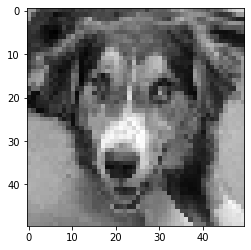

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(training_data[1][0], cmap='gray')

In [ ]:
training_data[1][1]

array([0., 1.])

# Training Convnet

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 32, 5)
    self.conv2 = nn.Conv2d(32, 64, 5)
    self.conv3 = nn.Conv2d(64, 128, 5)
    self.fc1 = nn.Linear(4*4*50, 512)
    self.fc2 = nn.Linear(512, 2)

  def forwarld(self, x):
    x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
    x = F.max_pool2d(F.relu(self.conv2(x)), (2,2))
    x = F.max_pool2d(F.relu(self.conv3(x)), (2,2))
    x = F.relu(self.fc1(x))
    x = F.softmax(self.fc2(x))
    return x

In [ ]:
net = Net()

In [ ]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_function = nn.MSELoss()

X = torch.Tensor([i[0] for i in training_data]).view(-1, 50, 50)
X = X/255.0
y = torch.Tensor([i[1] for i in training_data])

VAL_PCT = 0.1
val_size = int(len(X)*VAL_PCT)
print(val_size)

2494


In [ ]:
train_X = X[:-val_size]
train_y = y[:-val_size]

test_X = X[-val_size:]
test_y = y[-val_size:]

print(len(train_X))
print(len(test_X))

22452
2494


In [ ]:
BATCH_SIZE = 100
EPOCHS = 1

for epoch in range(EPOCHS):
  for i in tqdm(range(0, len(train_X), BATCH_SIZE)):
    batch_X = train_X[i:i+BATCH_SIZE].view(-1, 1, 50, 50)
    batch_y = train_y[i:i+BATCH_SIZE]

    net.zero_grad()
    outputs = net(batch_X)
    loss = loss_function(outputs, batch_y)
    loss.backwards()
    optimizer.step()

print(loss)

  0%|          | 0/225 [00:00<?, ?it/s]


NotImplementedError: ignored